In [5]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

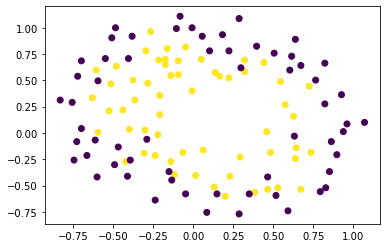

In [14]:
# read data
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:,:-1]
y_data = data[:, -1]
plt.scatter(x_data[:,0], x_data[:,1], c = y_data)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)# 0.2test data,  0.8 train data
# building decision tree model
model = tree.DecisionTreeClassifier()
model.fit(x_data, y_data)

DecisionTreeClassifier()

In [17]:
# export decision tree
import graphviz
dot_data = tree.export_graphviz(model, out_file = None,feature_names = ["x","y"], class_names = ["label0","label1"],
                               filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)

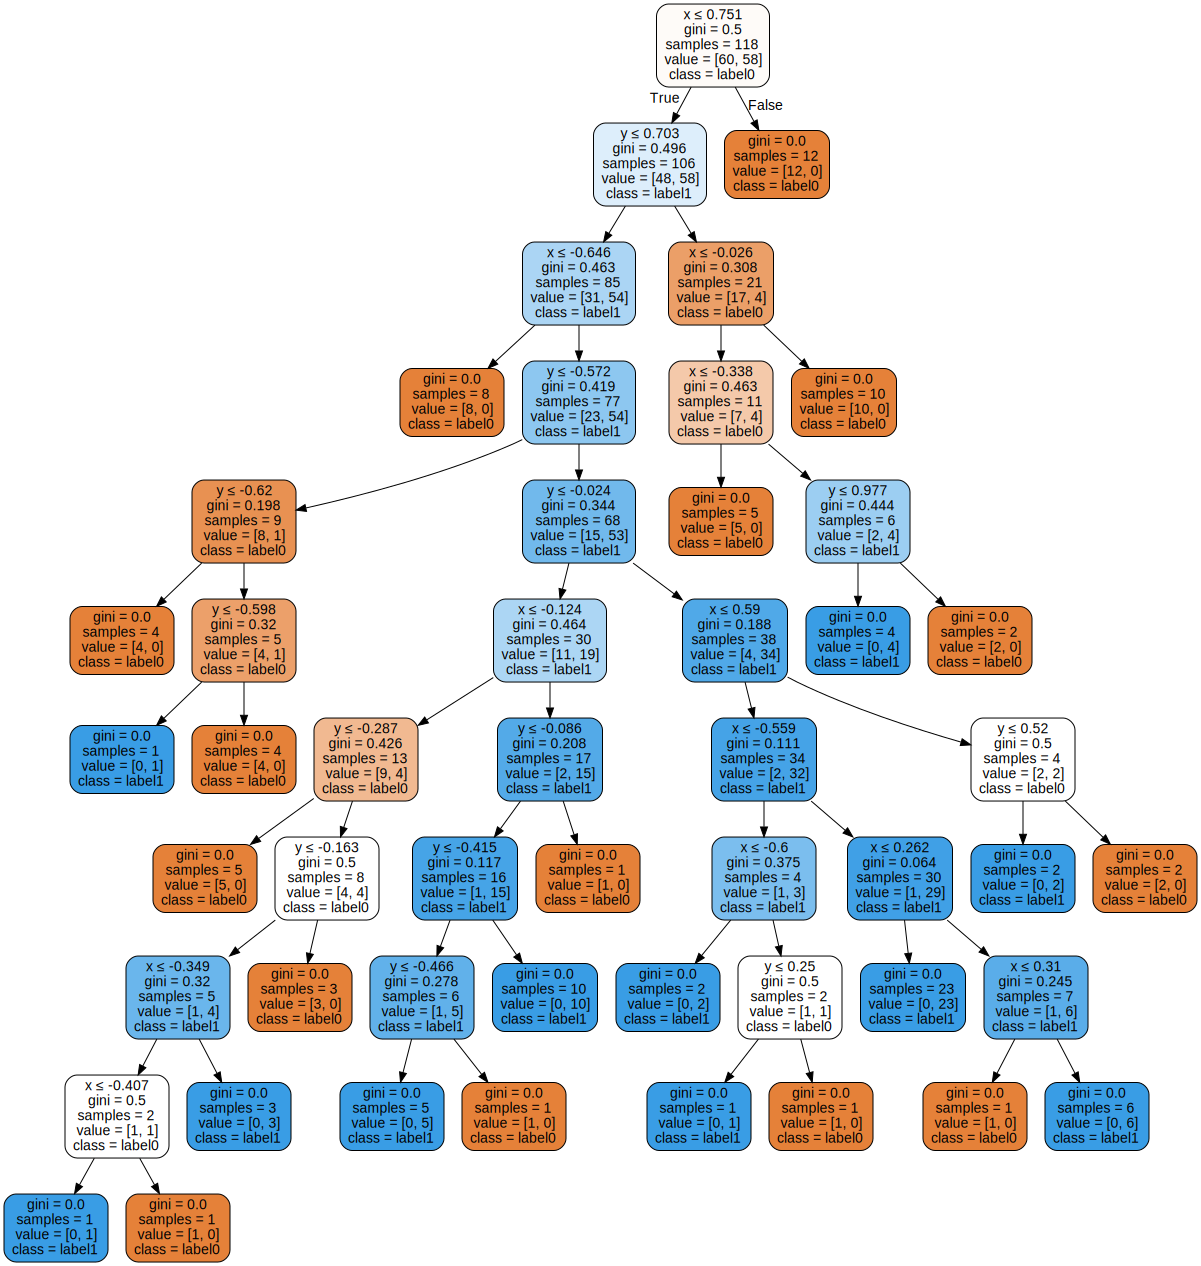

In [18]:
graph

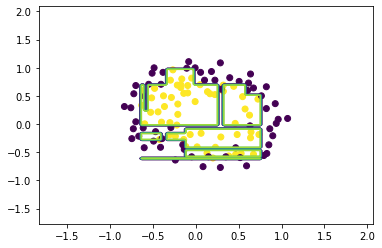

In [19]:
# 获取数据值所在边界
x_min, x_max = x_data[:,0].min()-1, x_data[:,0].max()+1
y_min, y_max = x_data[:,1].min()-1, x_data[:,1].max()+1
# matrix net 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max,0.02))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
# contour line 
cl = plt.contour(xx,yy,z)
plt.scatter(x_data[:,0], x_data[:,1], c = y_data)
plt.show()

In [21]:
predictions = model.predict(x_train)
print(classification_report(predictions, y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



In [22]:
predictions = model.predict(x_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

